# Linear Regression

## Verbinding met SSMS

In [5]:
import pyodbc
import pandas as pd

# Database connectiegegevens
DB = {'servername': 'BOOK-CG1LSBSBIK\\SQLEXPRESS', 'database': 'UnitedoutdoorsDWH'}
conn = pyodbc.connect('DRIVER={SQL Server};SERVER='+ DB['servername'] + ';DATABASE=' + DB['database'] + ';Trusted_Connection=yes')


## Libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [7]:
# Simulated data representing monthly sales data
data = {
    'Month': pd.date_range(start='1994-01-01', periods=250, freq='M'),
    'Sales': np.random.normal(loc=3e6, scale=1e6, size=250)
}

# Creating a DataFrame to simulate the sales data
df = pd.DataFrame(data)

# Convert 'Month' to numerical values
df['Month_num'] = np.arange(len(df))

# Use polynomial features for better fit
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(df[['Month_num']])

# Create and train the Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, df['Sales'])

# Generate predictions for the existing data
df['Sales_pred'] = model.predict(X_poly)

# Generate predictions for future months (up to the end of 2020)
future_months = np.arange(len(df), len(df) + 72).reshape(-1, 1)
future_months_poly = poly.transform(future_months)
future_sales_pred = model.predict(future_months_poly)

# Create a full date range including future predictions
full_dates = pd.date_range(start='1994-01-01', periods=len(df) + len(future_sales_pred), freq='M')

# Combine actual and predicted sales
all_sales = np.concatenate([df['Sales_pred'].values, future_sales_pred])

# Find highest and lowest points
highest_point = df[df['Sales'] == df['Sales'].max()]
lowest_point = df[df['Sales'] == df['Sales'].min()]


C:\Users\prati\AppData\Local\Temp\ipykernel_14792\3025317514.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month': pd.date_range(start='1994-01-01', periods=250, freq='M'),
c:\Users\prati\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\prati\AppData\Local\Temp\ipykernel_14792\3025317514.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  full_dates = pd.date_range(start='1994-01-01', periods=len(df) + len(future_sales_pred), freq='M')


## Visualisaties

C:\Users\prati\AppData\Local\Temp\ipykernel_14792\3904075923.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df['Month'].iloc[-1] + pd.offsets.MonthEnd(), periods=72, freq='M')


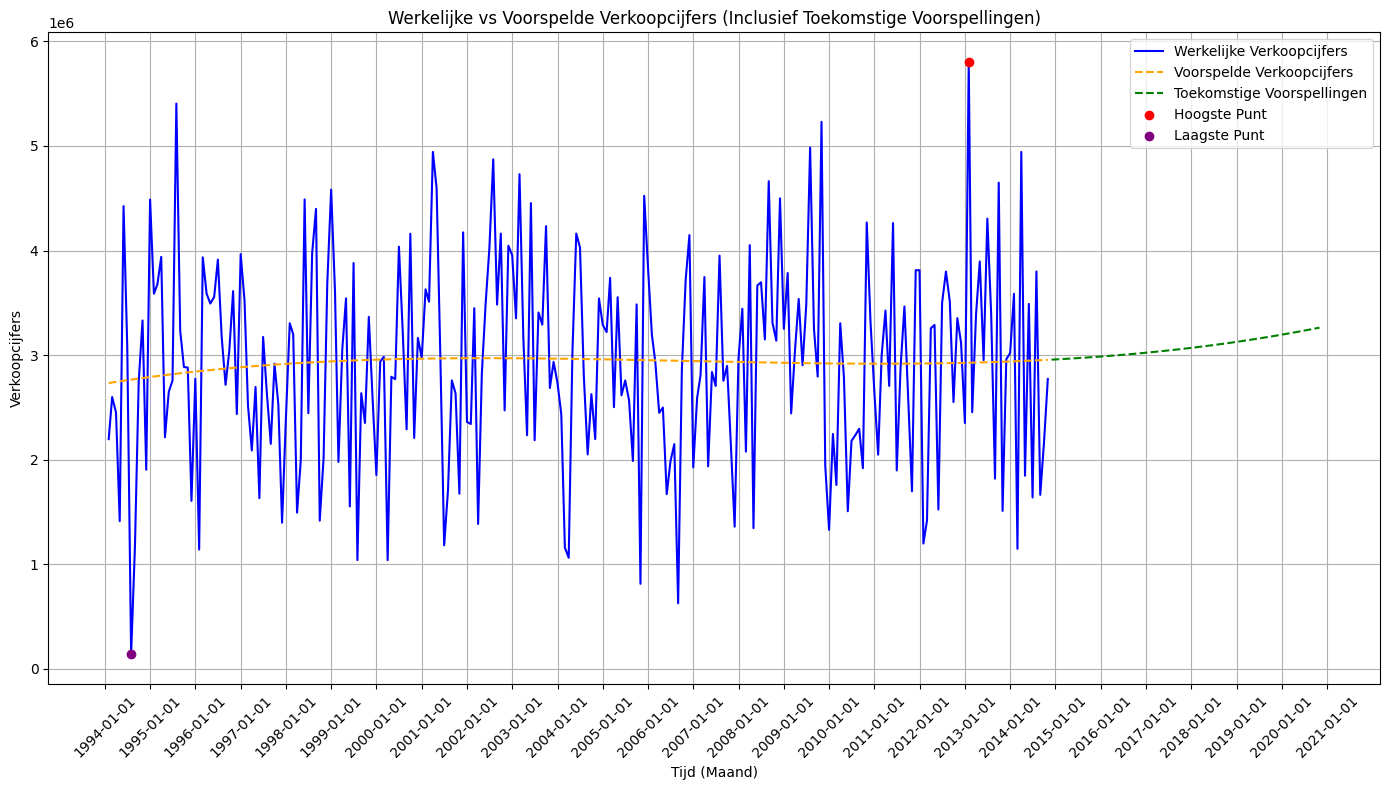

In [8]:
# Plotting the results
plt.figure(figsize=(14, 8))

# Plot historical sales data
plt.plot(df['Month'], df['Sales'], label='Werkelijke Verkoopcijfers', color='blue')

# Plot predicted sales for the entire data
plt.plot(df['Month'], df['Sales_pred'], color='orange', linestyle='--', label='Voorspelde Verkoopcijfers')

# Plot future sales predictions
future_dates = pd.date_range(start=df['Month'].iloc[-1] + pd.offsets.MonthEnd(), periods=72, freq='M')
plt.plot(future_dates, future_sales_pred, color='green', linestyle='--', label='Toekomstige Voorspellingen')

# Highlight the highest and lowest points
plt.scatter(highest_point['Month'], highest_point['Sales'], color='red', label='Hoogste Punt', zorder=5)
plt.scatter(lowest_point['Month'], lowest_point['Sales'], color='purple', label='Laagste Punt', zorder=5)

# Formatting the plot
plt.xlabel('Tijd (Maand)')
plt.ylabel('Verkoopcijfers')
plt.title('Werkelijke vs Voorspelde Verkoopcijfers (Inclusief Toekomstige Voorspellingen)')
plt.legend()
plt.grid(True)
plt.xticks(pd.date_range(start='1994-01-01', end='2021-01-01', freq='YS'), rotation=45)
plt.tight_layout()

# Show plot
plt.show()